*Note this is starter code, you need to make your own copy of this, File -> Save a copy in Drive, and then edit your own copy*

#Setup: load the data, install libraries

In [2]:
#download data from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Download actual file
file_dia = drive.CreateFile({'id': '1aaYw_S3868IcWGMuimKzOdAvXahn58Y1'})
file_dia.GetContentFile('arrythmia.csv')

file_zip = drive.CreateFile({'id': '1H_ZzQ4LOBX_GlhpnWwnIEYxRVgVQERBk'})
file_zip.GetContentFile('mit-bih-arrhythmia-database-1.0.0.zip')

!unzip -o mit-bih-arrhythmia-database-1.0.0.zip

#install wfdb
!pip install wfdb


Archive:  mit-bih-arrhythmia-database-1.0.0.zip
 extracting: mit-bih-arrhythmia-database-1.0.0/231.atr  
 extracting: mit-bih-arrhythmia-database-1.0.0/214.atr  
 extracting: mit-bih-arrhythmia-database-1.0.0/203.hea  
 extracting: mit-bih-arrhythmia-database-1.0.0/202.xws  
 extracting: mit-bih-arrhythmia-database-1.0.0/234.xws  
 extracting: mit-bih-arrhythmia-database-1.0.0/205.xws  
 extracting: mit-bih-arrhythmia-database-1.0.0/228.dat  
 extracting: mit-bih-arrhythmia-database-1.0.0/index.shtml.shtml  
 extracting: mit-bih-arrhythmia-database-1.0.0/220.xws  
 extracting: mit-bih-arrhythmia-database-1.0.0/117.atr  
 extracting: mit-bih-arrhythmia-database-1.0.0/233.xws  
 extracting: mit-bih-arrhythmia-database-1.0.0/234.hea  
 extracting: mit-bih-arrhythmia-database-1.0.0/108.hea  
 extracting: mit-bih-arrhythmia-database-1.0.0/205.hea  
 extracting: mit-bih-arrhythmia-database-1.0.0/231.dat  
 extracting: mit-bih-arrhythmia-database-1.0.0/220.dat  
 extracting: mit-bih-arrhythmi

In [0]:
import wfdb
import numpy as np
import math
from wfdb import processing

#Part 1

Question 1.1

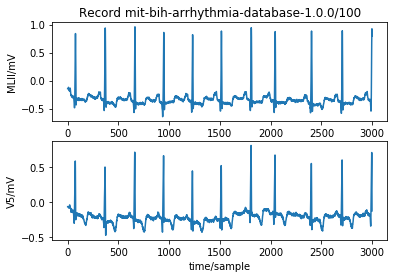

In [0]:
filename='mit-bih-arrhythmia-database-1.0.0/100'

record = wfdb.rdrecord(filename,sampto=3000) 
wfdb.plot_wfdb(record=record, title='Record '+filename) 

Question 1.2

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


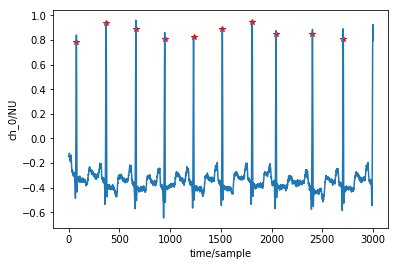

In [0]:
sig, fields = wfdb.rdsamp(filename, channels=[0],sampto=3000)
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()
wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


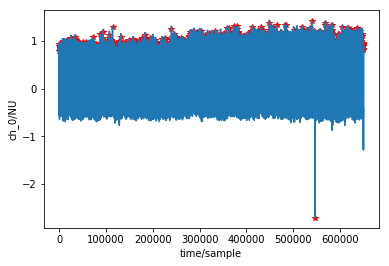

2273

In [0]:
sig, fields = wfdb.rdsamp(filename, channels=[0])
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()
wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])
len(xqrs.qrs_inds)

Question 1.3

In [0]:
def find_QRS_duration(values, index):
  # you need to change and complete this function's code
  i = index
  j = index
  left_found = False
  right_found = False
  
  if index in [0, -1]:
    result = 0
    
  else:
    while i in range(index, 0, -1) and not left_found:
      if values[i] <= values[i-1]:
        left_idx = i - 1
        left_found = True
      else:
        i -= 1    
    while j in range(index, len(values) - 1, 1) and not right_found:
      if values[j] <= values[j+1]:
        right_idx = j + 1
        right_found = True
      else:
        j += 1
    if (not right_found) or (not left_found):
      result = 0
    else:
      result = right_idx - left_idx
      
  return result


test1 = np.array([3,1,1,-1,-2,-1,4,3,2,1,0,0,0,1,2,3,4])
assert find_QRS_duration(test1, 6) == 8

test2 = np.array([3,1,4,-3,7])
assert find_QRS_duration(test2, 2) == 4

Question 1.4

In [0]:
def find_average_QRS_duration(filename):
  # you need to change and complete this function's code
  sig, fields = wfdb.rdsamp(filename, channels=[0])
  xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
  xqrs.detect()
  sum_duration = 0
  num_qrs = 0
  for peak in xqrs.qrs_inds:
    if find_QRS_duration(sig[:,0], peak) != 0:
      sum_duration += find_QRS_duration(sig[:, 0], peak)
      num_qrs += 1
    else:
      sum_duration += 0
      num_qrs += 0
  result = sum_duration / num_qrs
  return result
  print(sum_duration)
  print(num_qrs)
  print(result)

In [6]:
find_average_QRS_duration('mit-bih-arrhythmia-database-1.0.0/100')

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


13.261883802816902

In [7]:
find_average_QRS_duration('mit-bih-arrhythmia-database-1.0.0/101')

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


23.484475374732334

In [8]:
find_average_QRS_duration('mit-bih-arrhythmia-database-1.0.0/102')

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


11.96936442615455

In [0]:
def find_average_QRS_duration(filename):
  # you need to change and complete this function's code
  sig, fields = wfdb.rdsamp(filename, channels=[0])
  xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
  xqrs.detect()
  sum_duration = 0
  num_qrs = 0
  for peak in xqrs.qrs_inds:
    if find_QRS_duration(sig[:,0], peak) != 0:
      sum_duration += find_QRS_duration(sig[:, 0], peak)
      num_qrs += 1
    else:
      sum_duration += 0
      num_qrs += 0
  result = sum_duration / num_qrs
  return result

assert math.isclose(find_average_QRS_duration('mit-bih-arrhythmia-database-1.0.0/100'), 13.260008798944126, rel_tol=1e-03)
assert math.isclose(find_average_QRS_duration('mit-bih-arrhythmia-database-1.0.0/101'), 23.484475374732334)
assert math.isclose(find_average_QRS_duration('mit-bih-arrhythmia-database-1.0.0/102'), 11.96936442615455)

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


#Part 2

##Step 1: Load the data

In [0]:
import numpy as np
import pandas as pd
names = ['Age','Sex','Height','Weight','QRS dur',
          'P-R int','Q-T int','T int','P int',
          'QRS','T','P','QRST','J','Heart rate']
df = pd.read_csv('arrythmia.csv',header=None)

originalclass = df[279]
arrythmia = originalclass != 1
df.drop(columns=[279],inplace=True)

# assign the first columns to names
df.rename(columns=dict(enumerate(names)),inplace=True)
df.rename(columns=dict(zip(range(15,279),range(16,280))),inplace=True)

# df is the data, originalclass and arrythmia are the targets
print(df.head())
print(arrythmia.head())
print(originalclass.head())


   Age  Sex  Height  Weight  QRS dur  P-R int  ...  274  275  276  277   278   279
0   49    1     162      54       78        0  ...  0.0    0  0.1  0.5  15.8  19.8
1   66    1     160      70       76      160  ...  0.0    0 -0.4  1.7  28.1  44.0
2   50    1     174      90       81      105  ...  0.0    0 -0.3  1.6   3.5  18.5
3   29    0     172      69       93      129  ...  0.0    0  0.3  1.7  20.4  30.6
4   64    0     170      70       94      162  ...  0.0    0  1.2 -1.9  14.3  -6.2

[5 rows x 279 columns]
0    False
1     True
2    False
3     True
4     True
Name: 279, dtype: bool
0     1
1    16
2     1
3     6
4     2
Name: 279, dtype: int64


### load a few metrics

In [0]:
import numpy as np
import pandas as pd
from scipy import interp
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, neighbors, svm, calibration, tree, ensemble, model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#not great but suppressess warning messages :)
import warnings
warnings.filterwarnings("ignore")

def test_model(model, X, y, show_plot=True):
  cv = StratifiedKFold(n_splits=5)

  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  print("score " + str(model_selection.cross_val_score(model, X, y, scoring='accuracy')))
  
  i = 0
  for train, test in cv.split(X, y):
      probas_ = model.fit(X[train], y[train]).predict_proba(X[test])
      
      # Compute ROC curve and area the curve
      fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
      tprs.append(interp(mean_fpr, fpr, tpr))
      tprs[-1][0] = 0.0
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      if show_plot:
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))


      i += 1

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

  if show_plot:
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
  
  print('Mean ROC (AUC = %0.8f +- %0.8f)' % (mean_auc, std_auc))
  
from sklearn.metrics import f1_score

def test_model_multi(model, X, y):
  cv = StratifiedKFold(n_splits=3)

  scores = np.zeros(3)
  i = 0
  for train, test in cv.split(X, y):
      yp = model.fit(X[train], y[train]).predict(X[test])
      scores[i] = f1_score(y[test], yp, average='weighted')
      i += 1
  print("avg f1-score=%0.2f" % np.mean(scores))

##Step 2: Change this to get better performance for binary classification

score [0.68211921 0.65562914 0.72666667]


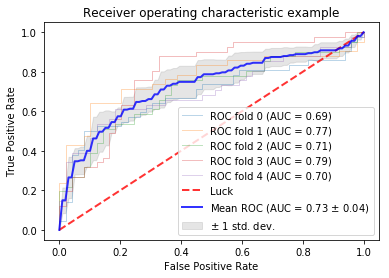

Mean ROC (AUC = 0.72833914 +- 0.03933141)


In [0]:
from sklearn.linear_model import LogisticRegression

logi_model = LogisticRegression()

test_model(logi_model, df.values, arrythmia.values)

### Feature selection

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

feature_names = df.columns.values
for i in range(len(feature_names), 1, -1):
  #PCA is effected by scale so we scale the features to a unit vector
  data_scaled = StandardScaler().fit_transform(df.values)
  
  pca = PCA(n_components=i-1)
  principalComponents = pca.fit_transform(data_scaled)
  print("PCA %d " % (i-1), end='')
  test_model(LogisticRegression(), principalComponents, arrythmia.values, False)
  
  # PCA to choose features

PCA 278 score [0.70860927 0.64900662 0.71333333]
Mean ROC (AUC = 0.76075388 +- 0.04120770)
PCA 277 score [0.70860927 0.64900662 0.71333333]
Mean ROC (AUC = 0.76075388 +- 0.04120770)
PCA 276 score [0.70860927 0.64900662 0.71333333]
Mean ROC (AUC = 0.76075388 +- 0.04120770)
PCA 275 score [0.70860927 0.64900662 0.71333333]
Mean ROC (AUC = 0.76075388 +- 0.04120770)
PCA 274 score [0.70860927 0.64900662 0.71333333]
Mean ROC (AUC = 0.76075388 +- 0.04120770)
PCA 273 score [0.70860927 0.64900662 0.71333333]
Mean ROC (AUC = 0.76075388 +- 0.04120770)
PCA 272 score [0.70860927 0.64900662 0.71333333]
Mean ROC (AUC = 0.76075388 +- 0.04120770)
PCA 271 score [0.70860927 0.64900662 0.71333333]
Mean ROC (AUC = 0.76065533 +- 0.04136145)
PCA 270 score [0.70860927 0.64900662 0.71333333]
Mean ROC (AUC = 0.76075388 +- 0.04120770)
PCA 269 score [0.70860927 0.64900662 0.71333333]
Mean ROC (AUC = 0.76075388 +- 0.04120770)
PCA 268 score [0.70860927 0.64900662 0.71333333]
Mean ROC (AUC = 0.76075388 +- 0.04120770)

PCA 14 score [0.72847682 0.7615894  0.80666667]
Mean ROC (AUC = 0.81378594 +- 0.04040028)

In [0]:
# Choose first 14 principle components
data_scaled = StandardScaler().fit_transform(df.values)
pca = PCA(n_components=14)
principalComponents = pca.fit_transform(data_scaled)

### Logistic regression

score [0.72847682 0.7615894  0.80666667]


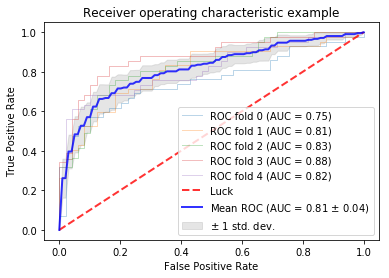

Mean ROC (AUC = 0.81378594 +- 0.04040028)


In [0]:
logi_model = LogisticRegression()
test_model(logi_model, principalComponents, arrythmia.values)

### K Nearest Neighbors

score [0.7218543  0.72847682 0.68666667]


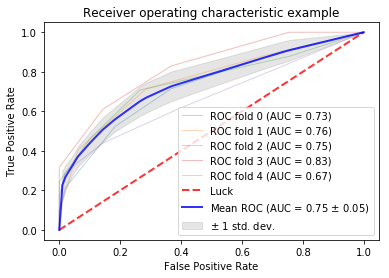

Mean ROC (AUC = 0.74537172 +- 0.05067122)


In [0]:
# KNN with features selected
from sklearn import neighbors

knn_model = neighbors.KNeighborsClassifier()

test_model(knn_model, principalComponents, arrythmia.values)

### Support vector machine

score [0.7218543  0.7615894  0.79333333]


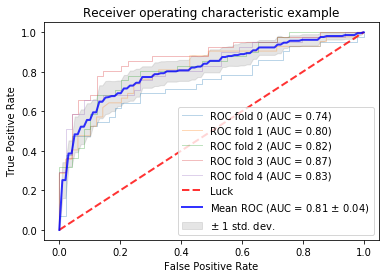

Mean ROC (AUC = 0.81085193 +- 0.04214959)


In [0]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear',probability=True)

test_model(svm_model, principalComponents, arrythmia.values)

### Tree-based Models
#### Hyperparameter Tuning

In [0]:
from sklearn.model_selection import GridSearchCV
# First I will define two functions to help me get the optimized estimator parameters and the importance of features

def show_optimized_parameters(model, params, x_train, y_train):
    """function that takes a model, a dictionary of parameters of tree model, and traing x and y as parameters and 
    print the optimized parameters
    """
    grid = GridSearchCV(model, params)
    grid.fit(x_train, y_train)
    print(grid.best_estimator_)

#### Decision tree

In [0]:
# Exploring the optimized parameters for the tree
Tree = tree.DecisionTreeClassifier()
params = {"max_depth":np.arange(2,50)
              }
show_optimized_parameters(Tree, params, principalComponents, arrythmia.values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


score [0.66887417 0.7218543  0.72      ]


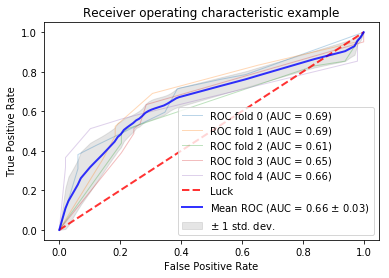

Mean ROC (AUC = 0.66014563 +- 0.03122350)


In [0]:
# Decision tree with optimized parameters
tree_model = tree.DecisionTreeClassifier(max_depth=5)
test_model(tree_model, principalComponents, arrythmia.values)

#### Random Forest

In [0]:
# Exploring the optimized parameters for the random forest
from sklearn.ensemble import RandomForestClassifier
RF = ensemble.RandomForestClassifier()
params = {"max_depth":np.arange(2,50)
              }
show_optimized_parameters(RF, params, principalComponents, arrythmia.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=35, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


score [0.74172185 0.68874172 0.78      ]


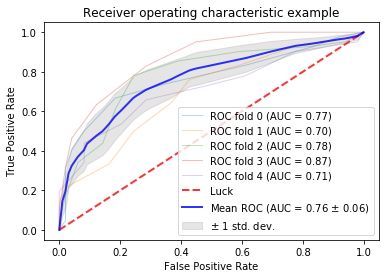

Mean ROC (AUC = 0.76395359 +- 0.06058816)


In [0]:
# Random Forests with optimized parameters
rf_model = ensemble.RandomForestClassifier(max_depth=35)
test_model(rf_model, principalComponents, arrythmia.values)

#### Ada Boosting

In [0]:
# Exploring the optimized parameters for the adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
params = {"n_estimators":np.arange(10,100),
               "learning_rate":(1, 0.01, 0.001)
}
show_optimized_parameters(adaboost, params, principalComponents, arrythmia.values)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=21, random_state=None)


score [0.67549669 0.72847682 0.76666667]


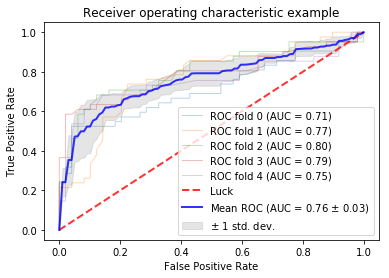

Mean ROC (AUC = 0.76210162 +- 0.03080043)


In [0]:
# Ada Boosting with features selected
ada_model = AdaBoostClassifier(n_estimators=21, learning_rate=1)
test_model(ada_model, principalComponents, arrythmia.values)

#### Gradient Boosting

In [0]:
# Exploring the optimized parameters for the gradient boost classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
params = {"n_estimators":np.arange(10,100),
               "learning_rate":(1, 0.01, 0.001)
}
show_optimized_parameters(gb, params, principalComponents, arrythmia.values)

GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=1,
                           loss='deviance', max_depth=3, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=42, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


score [0.70860927 0.71523179 0.75333333]


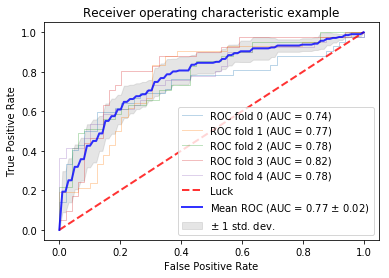

Mean ROC (AUC = 0.77381598 +- 0.02453889)


In [0]:
#Call training model, B=500, λ=0.01，d=1
gb_model = GradientBoostingClassifier(n_estimators=42, learning_rate=1)
test_model(gb_model, principalComponents, arrythmia.values)

##Step 3: Change this to get better performance for multiclass

In [0]:
model = LogisticRegression(solver='lbfgs',multi_class='multinomial')    
test_model_multi(model, df.values, originalclass.values)

avg f1-score=0.62


### Feature selection

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

feature_names = df.columns.values
for i in range(len(feature_names), 1, -1):
  #PCA is effected by scale so we scale the features to a unit vector
  data_scaled = StandardScaler().fit_transform(df.values)
  
  pca = PCA(n_components=i-1)
  principalComponents = pca.fit_transform(data_scaled)
  print("PCA %d " % (i-1), end='')
  test_model_multi(LogisticRegression(solver='lbfgs',multi_class='multinomial'), principalComponents, originalclass.values)

PCA 278 avg f1-score=0.64
PCA 277 avg f1-score=0.64
PCA 276 avg f1-score=0.64
PCA 275 avg f1-score=0.64
PCA 274 avg f1-score=0.64
PCA 273 avg f1-score=0.64
PCA 272 avg f1-score=0.64
PCA 271 avg f1-score=0.64
PCA 270 avg f1-score=0.64
PCA 269 avg f1-score=0.64
PCA 268 avg f1-score=0.64
PCA 267 avg f1-score=0.64
PCA 266 avg f1-score=0.64
PCA 265 avg f1-score=0.64
PCA 264 avg f1-score=0.64
PCA 263 avg f1-score=0.64
PCA 262 avg f1-score=0.64
PCA 261 avg f1-score=0.64
PCA 260 avg f1-score=0.64
PCA 259 avg f1-score=0.64
PCA 258 avg f1-score=0.64
PCA 257 avg f1-score=0.64
PCA 256 avg f1-score=0.64
PCA 255 avg f1-score=0.64
PCA 254 avg f1-score=0.64
PCA 253 avg f1-score=0.64
PCA 252 avg f1-score=0.64
PCA 251 avg f1-score=0.64
PCA 250 avg f1-score=0.64
PCA 249 avg f1-score=0.64
PCA 248 avg f1-score=0.64
PCA 247 avg f1-score=0.64
PCA 246 avg f1-score=0.64
PCA 245 avg f1-score=0.64
PCA 244 avg f1-score=0.64
PCA 243 avg f1-score=0.64
PCA 242 avg f1-score=0.64
PCA 241 avg f1-score=0.64
PCA 240 avg 

PCA 8 avg f1-score=0.67;
PCA 11 avg f1-score=0.67


In [0]:
# Choose first 20 principle components
data_scaled = StandardScaler().fit_transform(df.values)
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(data_scaled)

### Logistic regression

In [0]:
logi_model = LogisticRegression(solver='lbfgs',multi_class='multinomial')
test_model_multi(logi_model, principalComponents, originalclass.values)

avg f1-score=0.67


### K Nearest Neighbors

In [0]:
knn_model = neighbors.KNeighborsClassifier()
test_model_multi(knn_model, principalComponents, originalclass.values)

avg f1-score=0.57


### Support Vector Machine

In [0]:
svm_model = svm.SVC(kernel='linear',probability=True)
test_model_multi(svm_model, principalComponents, originalclass.values)

avg f1-score=0.65


### Tree-based Models

#### Hyperparameter Tuning

In [0]:
from sklearn.model_selection import GridSearchCV
# First I will define two functions to help me get the optimized estimator parameters and the importance of features

def show_optimized_parameters(model, params, x_train, y_train):
    """function that takes a model, a dictionary of parameters of tree model, and traing x and y as parameters and 
    print the optimized parameters
    """
    grid = GridSearchCV(model, params)
    grid.fit(x_train, y_train)
    print(grid.best_estimator_)

#### Decision Tree

In [0]:
# Exploring the optimized parameters for the tree
Tree = tree.DecisionTreeClassifier()
params = {"max_depth":np.arange(2,50)
              }
show_optimized_parameters(Tree, params, principalComponents, originalclass.values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [0]:
# Decision tree with optimized parameters
tree_model = tree.DecisionTreeClassifier(max_depth=7)
test_model_multi(tree_model, principalComponents, originalclass.values)

avg f1-score=0.55


#### Random Forest

In [0]:
# Exploring the optimized parameters for the random forest
from sklearn.ensemble import RandomForestClassifier
RF = ensemble.RandomForestClassifier()
params = {"max_depth":np.arange(2,50),
              }
show_optimized_parameters(RF, params, principalComponents, originalclass.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [0]:
# Random Forests with optimized parameters
rf_model = ensemble.RandomForestClassifier(max_depth=20, n_estimators=100)
test_model_multi(rf_model, principalComponents, originalclass.values)

avg f1-score=0.62


#### Ada Boosting

In [0]:
# Exploring the optimized parameters for the adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
params = {"n_estimators":np.arange(10,100),
          "learning_rate":(1, 0.01, 0.001)
}
show_optimized_parameters(adaboost, params, principalComponents, originalclass.values)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=10, random_state=None)


In [0]:
# Ada Boosting with features selected
ada_model = AdaBoostClassifier(n_estimators=10, learning_rate=1)
test_model_multi(ada_model, principalComponents, originalclass.values)

avg f1-score=0.44


#### Gradient Boosting

In [0]:
# Exploring the optimized parameters for the gradient boost classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
params = {"n_estimators":np.arange(10,100),
               "learning_rate":(1, 0.01, 0.001)
}
show_optimized_parameters(gb, params, principalComponents, originalclass.values)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=62,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [0]:
#Call training model, B=62, λ=0.01，d=1
gb_model = GradientBoostingClassifier(n_estimators=62, learning_rate=0.01)
test_model_multi(gb_model, principalComponents, originalclass.values)

avg f1-score=0.55
